In [2]:
import pandas as pd
import numpy as np

In [3]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
print("*****Transactional Data********")
print("Size", transaction_data.shape)
print('Info about data types', transaction_data.info())
print('Discription', transaction_data.describe())
print('Missing Values check', transaction_data.isnull().sum())

*****Transactional Data********
Size (264836, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
Info about data types None
Discription                 DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min    

In [5]:
print("*****Customer Data********")
print("Size", customer_data.shape)
print('Info about data types', customer_data.info())
print('Discription', customer_data.describe())
print('Missing Values check', customer_data.isnull().sum())

*****Customer Data********
Size (72637, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
Info about data types None
Discription        LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06
Missing Values check LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [6]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
print('Product QTY outliers > 5')
print(transaction_data.loc[transaction_data['PROD_QTY'] > 5])

#Removing rows of outliers

transaction_data = transaction_data[transaction_data['PROD_QTY'] != 200]

print("\nUnique values in 'PROD_QTY' after outlier removal:")
print(transaction_data['PROD_QTY'].unique())

Product QTY outliers > 5
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  

Unique values in 'PROD_QTY' after outlier removal:
[2 3 5 1 4]


In [9]:
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)[gG]')[0].astype(int)

print(transaction_data['PACK_SIZE'].describe())

print(transaction_data['PACK_SIZE'].unique())

count    264834.000000
mean        182.425512
std          64.325148
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64
[175 170 150 300 330 210 270 220 125 110 134 380 180 165 135 250 200 160
 190  90  70]


In [10]:
print(transaction_data['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [11]:
transaction_data['BRAND_NAME'] = transaction_data['PROD_NAME'].apply(lambda x: x.split(' ')[0])

def clean_brand_name(brand):
    brand = brand.upper() 
    if 'RRD' in brand:
        return 'RED ROCK DELI'
    elif 'NCC' in brand:
        return 'NATURAL CHIP CO'
    elif 'COKE' in brand or 'COLA' in brand: 
        return 'COCA COLA'
    elif 'WW' in brand:
        return 'WOOLWORTHS'
    elif 'SMITH' in brand:
        return 'SMITHS'
    elif 'INFZ' in brand:
        return 'INFUZIONS'
    elif 'OLD' in brand:
        return 'OLD GOLD' 
    elif 'DORITO' in brand:
        return 'DORITOS'
    elif 'PRINGL' in brand:
        return 'PRINGLES'
    elif 'CHEETOS' in brand:
        return 'CHEETOS'
    elif 'SUNBIT' in brand:
        return 'SUNBITES'
    elif 'TOSTITOS' in brand:
        return 'TOSTITOS'
    return brand.title() 

transaction_data['BRAND_NAME'] = transaction_data['BRAND_NAME'].apply(clean_brand_name)

print("\nUnique BRAND_NAME values after cleaning:")
print(transaction_data['BRAND_NAME'].unique())
print(f"Number of unique brands: {len(transaction_data['BRAND_NAME'].unique())}")


Unique BRAND_NAME values after cleaning:
['Natural' 'Ccs' 'SMITHS' 'Kettle' 'OLD GOLD' 'Grain' 'DORITOS' 'Twisties'
 'WOOLWORTHS' 'Thins' 'Burger' 'NATURAL CHIP CO' 'Cheezels' 'INFUZIONS'
 'Red' 'PRINGLES' 'Infuzions' 'Grnwves' 'Tyrrells' 'Cobs' 'Woolworths'
 'French' 'RED ROCK DELI' 'TOSTITOS' 'CHEETOS' 'Snbts' 'SUNBITES']
Number of unique brands: 27


Part 2: Customer Data Examination

In [12]:
print(customer_data.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [13]:
print("\n Lifestage",customer_data['LIFESTAGE'].unique())
print("\n Customer Segment",customer_data['PREMIUM_CUSTOMER'].unique())


 Lifestage ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

 Customer Segment ['Premium' 'Mainstream' 'Budget']


In [14]:
print(customer_data.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [15]:
print({customer_data['LYLTY_CARD_NBR'].nunique()})
print({customer_data.shape[0]})

{72637}
{72637}


In [16]:
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')
print(data.shape)
print(data.info())

(264834, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264834 non-null  int64  
 1   STORE_NBR         264834 non-null  int64  
 2   LYLTY_CARD_NBR    264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int32  
 9   BRAND_NAME        264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 23.2+ MB
None


In [17]:
if pd.api.types.is_numeric_dtype(transaction_data['DATE']):
    print("Converting 'DATE' column from numeric to datetime...")
    transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')
    print("'DATE' column converted successfully.")
else:
    print("'DATE' column is already in datetime format or not numeric. Skipping conversion.")

print("\n--- Transaction Data after (conditional) DATE conversion ---")
print(transaction_data.info())
print("\nFirst 5 rows with converted DATE:")
print(transaction_data.head())

Converting 'DATE' column from numeric to datetime...
'DATE' column converted successfully.

--- Transaction Data after (conditional) DATE conversion ---
<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
 8   PACK_SIZE       264834 non-null  int32         
 9   BRAND_NAME      264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(2)
memory usage: 21.2+ MB
None

First 5

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


--- Merged Data Overview ---
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                  CCs Nacho Cheese    175g         3        6.3        175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150   

  BRAND_NAME               LIFESTAGE PREMIUM_CUSTOMER  
0    Natural   YOUNG SINGLES/COUPLES          Premium  
1        Ccs  MI

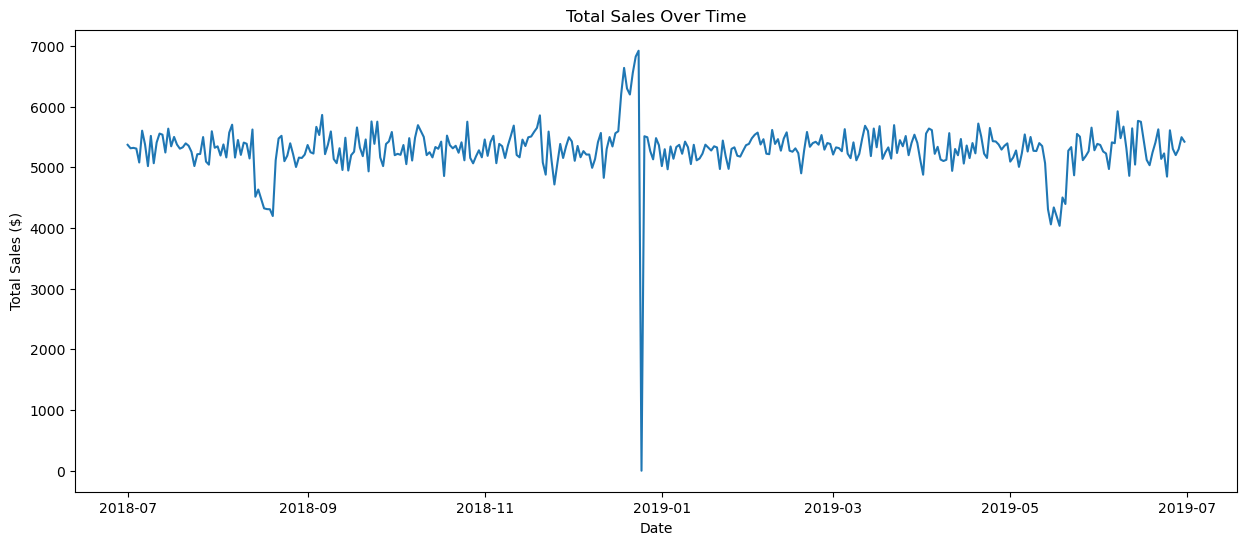


Sales on Christmas Day (2018-12-25): $0.00
Note: Sales were 0 on Christmas Day, which is expected.


In [19]:
# Step 8: Merge the Transaction and Customer Data
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')
print("\n--- Merged Data Overview ---")
print(data.head())
print(data.info())
print("Date range in merged data:", data['DATE'].min(), " - ", data['DATE'].max())

daily_sales = data.groupby('DATE')['TOT_SALES'].sum().reset_index()

all_dates = pd.date_range(start=daily_sales['DATE'].min(), end=daily_sales['DATE'].max())
missing_dates = all_dates[~all_dates.isin(daily_sales['DATE'])]

if not missing_dates.empty:
    print(f"Length of missing dates: {len(missing_dates)}")
    daily_sales_full = daily_sales.set_index('DATE').reindex(all_dates, fill_value=0).reset_index()
    daily_sales_full.rename(columns={'index': 'DATE'}, inplace=True)
    print("\nDaily Sales after filling missing dates with 0:")
    # This line should now correctly show 2018-12-25 with 0 sales
    print(daily_sales_full[daily_sales_full['TOT_SALES'] == 0])
else:
    daily_sales_full = daily_sales.copy()

# Plot total sales over time# Step 8: Merge the Transaction and Customer Data
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')
print("\n--- Merged Data Overview ---")
print(data.head())
print(data.info())
print("Date range in merged data:", data['DATE'].min(), " - ", data['DATE'].max())
plt.figure(figsize=(15, 6))
sns.lineplot(x='DATE', y='TOT_SALES', data=daily_sales_full)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)') # Added ($) for clarity
plt.show()

# If there's a big dip, like on Christmas, let's highlight it
christmas_day = pd.to_datetime('2018-12-25')
if christmas_day in daily_sales_full['DATE'].values:
    christmas_sales = daily_sales_full[daily_sales_full['DATE'] == christmas_day]['TOT_SALES'].iloc[0]
    print(f"\nSales on Christmas Day (2018-12-25): ${christmas_sales:.2f}")
    if christmas_sales == 0:
        print("Note: Sales were 0 on Christmas Day, which is expected.")

   PACK_SIZE  TOT_SALES
0        175   485437.4
1        150   304288.5
2        134   177655.5
3        110   162765.4
4        170   146673.0
5        330   136794.3
6        300   113330.6
7        165   101360.6
8        380    75419.6
9        270    55425.4


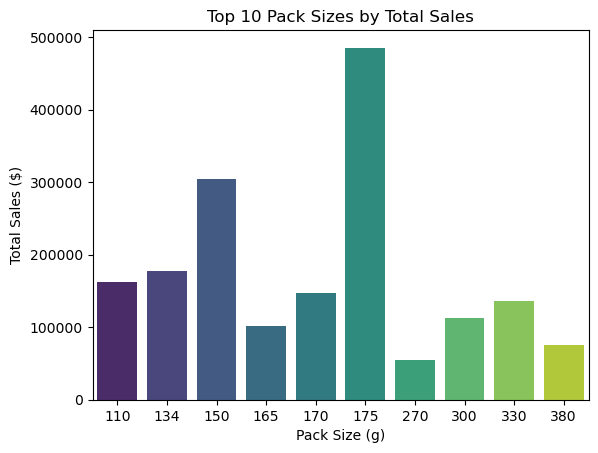

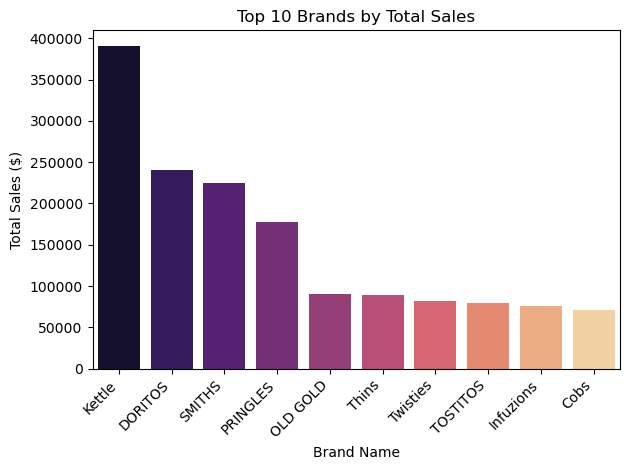

In [20]:
pack_size_sales = data.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending = False).reset_index()
print(pack_size_sales.head(10))

sns.barplot(x='PACK_SIZE', y = 'TOT_SALES', data = pack_size_sales.head(10), palette = 'viridis')
plt.title('Top 10 Pack Sizes by Total Sales')
plt.xlabel('Pack Size (g)')
plt.ylabel('Total Sales ($)')
plt.show()


brand_sales = data.groupby('BRAND_NAME')['TOT_SALES'].sum().sort_values(ascending = False).reset_index()

sns.barplot(x='BRAND_NAME', y= 'TOT_SALES', data = brand_sales.head(10), palette = 'magma')
plt.title('Top 10 Brands by Total Sales')
plt.xlabel("Brand Name")
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0           OLDER FAMILIES           Budget  168363.25
1    YOUNG SINGLES/COUPLES       Mainstream  157621.60
2                 RETIREES       Mainstream  155677.05
3           YOUNG FAMILIES           Budget  139345.85
4    OLDER SINGLES/COUPLES           Budget  136769.80
5    OLDER SINGLES/COUPLES       Mainstream  133393.80
6    OLDER SINGLES/COUPLES          Premium  132263.15
7                 RETIREES           Budget  113147.80
8           OLDER FAMILIES       Mainstream  103445.55
9                 RETIREES          Premium   97646.05
10          YOUNG FAMILIES       Mainstream   92788.75
11  MIDAGE SINGLES/COUPLES       Mainstream   90803.85
12          YOUNG FAMILIES          Premium   84025.50
13          OLDER FAMILIES          Premium   80658.40
14   YOUNG SINGLES/COUPLES           Budget   61141.60
15  MIDAGE SINGLES/COUPLES          Premium   58432.65
16   YOUNG SINGLES/COUPLES          Premium   41642.10
17  MIDAGE

<module 'matplotlib.pyplot' from 'c:\\Users\\gurpr\\anaconda3\\anaconda_new\\Lib\\site-packages\\matplotlib\\pyplot.py'>

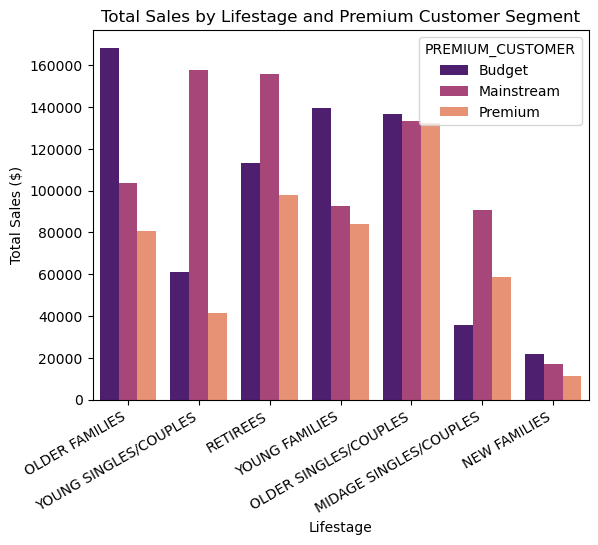

In [21]:
#Sales by customer segment

segment_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending = False).reset_index()
print(segment_sales)

sns.barplot(x = 'LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER', data=segment_sales, palette = 'magma')
plt.title('Total Sales by Lifestage and Premium Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales ($)')   
plt.xticks(rotation=30, ha = 'right')
plt